# **<center><b>Caso Titanic - Decision Tree</b></center>**

##<h2><b>1. Preparacion del Modelo</b></h2>

### <center><h2><b>1.1. Montar Titanic Dataset</b></h2></center>

In [333]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


###<h2><b>1.2. Importar Librerias Python</b></h2>

In [334]:
# Import Titanic DataSet
from load_titanic_dataset import load_titanic

# Decision Tree for Titanic
from datetime import datetime
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Metrics calculation
from sklearn.metrics import (
    accuracy_score,
    recall_score,
    precision_score,
    f1_score,
    roc_auc_score,
    roc_curve,
    confusion_matrix,
    classification_report,
    precision_recall_curve,
    average_precision_score,
    r2_score
)

# Import Visualization ML
import seaborn as sns
import matplotlib.pyplot as plt

#Import Other Libraries
import pandas as pd
import numpy as np
import joblib

### <h2><b>1.3. Cargar la data de Titanic</b></h2>



In [335]:
# Load Titanic dataset
print("Loading Titanic dataset...")
dataset = load_titanic('/content/titanic.csv')
X = dataset.data
y = dataset.target
print(f"Dataset loaded: {X.shape[0]} samples, {X.shape[1]} features")

Loading Titanic dataset...
Dataset loaded: 891 samples, 9 features


##<h2><b>2. Entrenamiento del modelo</b></h2>

### <h2><b>2.1. Divisón entre Test y Training Data</b></h2>

In [336]:
# Split Titanic dataset
print("Splitting dataset into train/test sets...")
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print(f"Train set size: {X_train.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")

Splitting dataset into train/test sets...
Train set size: 712 samples
Test set size: 179 samples


### <h2><b>2.2. Definir Hyperparametros</b></h2>

In [337]:
# Normalize features for Titanic dataset
print("Normalizing features to [0, 1] range...")
scaler = MinMaxScaler(feature_range=(0, 1))
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
print("Feature normalization completed")

# Create and train Decision Tree model
print("Creating Decision Tree Classifier (max_depth=4, criterion='gini')")
model = DecisionTreeClassifier(
    max_depth=4,
    criterion='entropy',
    random_state=42,
    splitter='best'
)

print("Training model...")
model.fit(X_train, y_train)
print("Model training completed")

Normalizing features to [0, 1] range...
Feature normalization completed
Creating Decision Tree Classifier (max_depth=4, criterion='gini')
Training model...
Model training completed


### <h2><b>2.3. Realización de Predicciones</b></h2>

In [338]:
# Make predictions for Titanic Dataset
print("Making predictions on test set...")
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]  # Probabilities for positive class

# Convert the likelyhood into binary label (0 o 1)
y_pred = (y_pred > 0.5)

# Evaluation metrics
print("\n" + classification_report(y_test, y_pred))
print("Predictions completed")

Making predictions on test set...

              precision    recall  f1-score   support

           0       0.78      0.94      0.85       110
           1       0.85      0.58      0.69        69

    accuracy                           0.80       179
   macro avg       0.82      0.76      0.77       179
weighted avg       0.81      0.80      0.79       179

Predictions completed


##<h2><b>3. Grafica de entrenamiento</b></h2>





### <h2><b>3.1. Gráfico Matriz de Confusión</b></h2>


              precision    recall  f1-score   support

           0       0.78      0.94      0.85       110
           1       0.85      0.58      0.69        69

    accuracy                           0.80       179
   macro avg       0.82      0.76      0.77       179
weighted avg       0.81      0.80      0.79       179

Generating confusion matrix...
Confusion Matrix:
[[103   7]
 [ 29  40]]


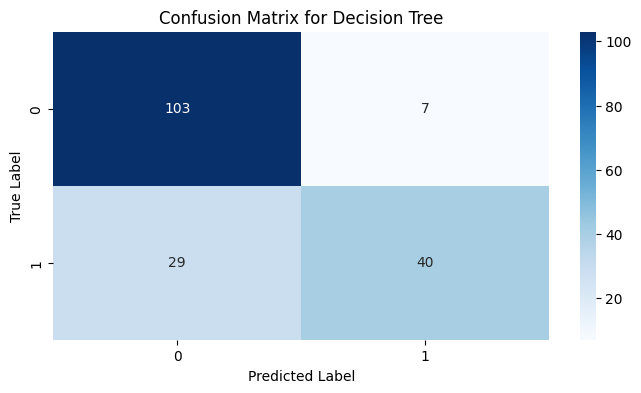

Confusion matrix saved as 'dt_confusion_matrix.png'


In [339]:
# Evaluation metrics
print("\n" + classification_report(y_test, y_pred))

print("Generating confusion matrix...")
cm = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n{cm}")

plt.figure(figsize=(8, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Decision Tree')
plt.show()
print("Confusion matrix saved as 'dt_confusion_matrix.png'")

### <h2><b>3.2. Gráfico Curva ROC</b></h2>

Generating ROC curve...


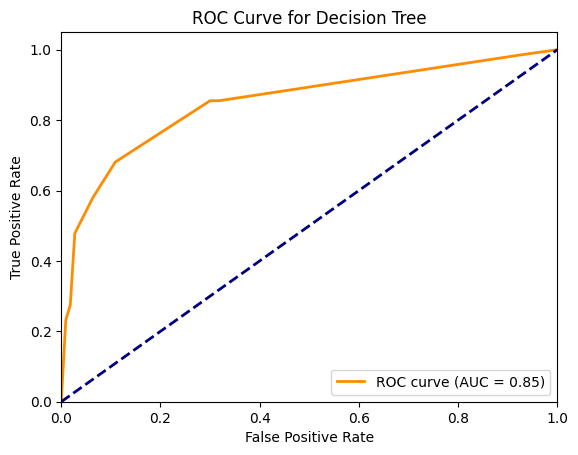

ROC curve saved as 'dt_roc_curve.png'


In [340]:
# ROC Curve
print("Generating ROC curve...")
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc_score(y_test, y_pred_proba):.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Decision Tree')
plt.legend(loc="lower right")
plt.show()
print("ROC curve saved as 'dt_roc_curve.png'")

### <h2><b>3.3. Visualización Arboles de Desciciones</b></h2>

Generating decision tree visualization...


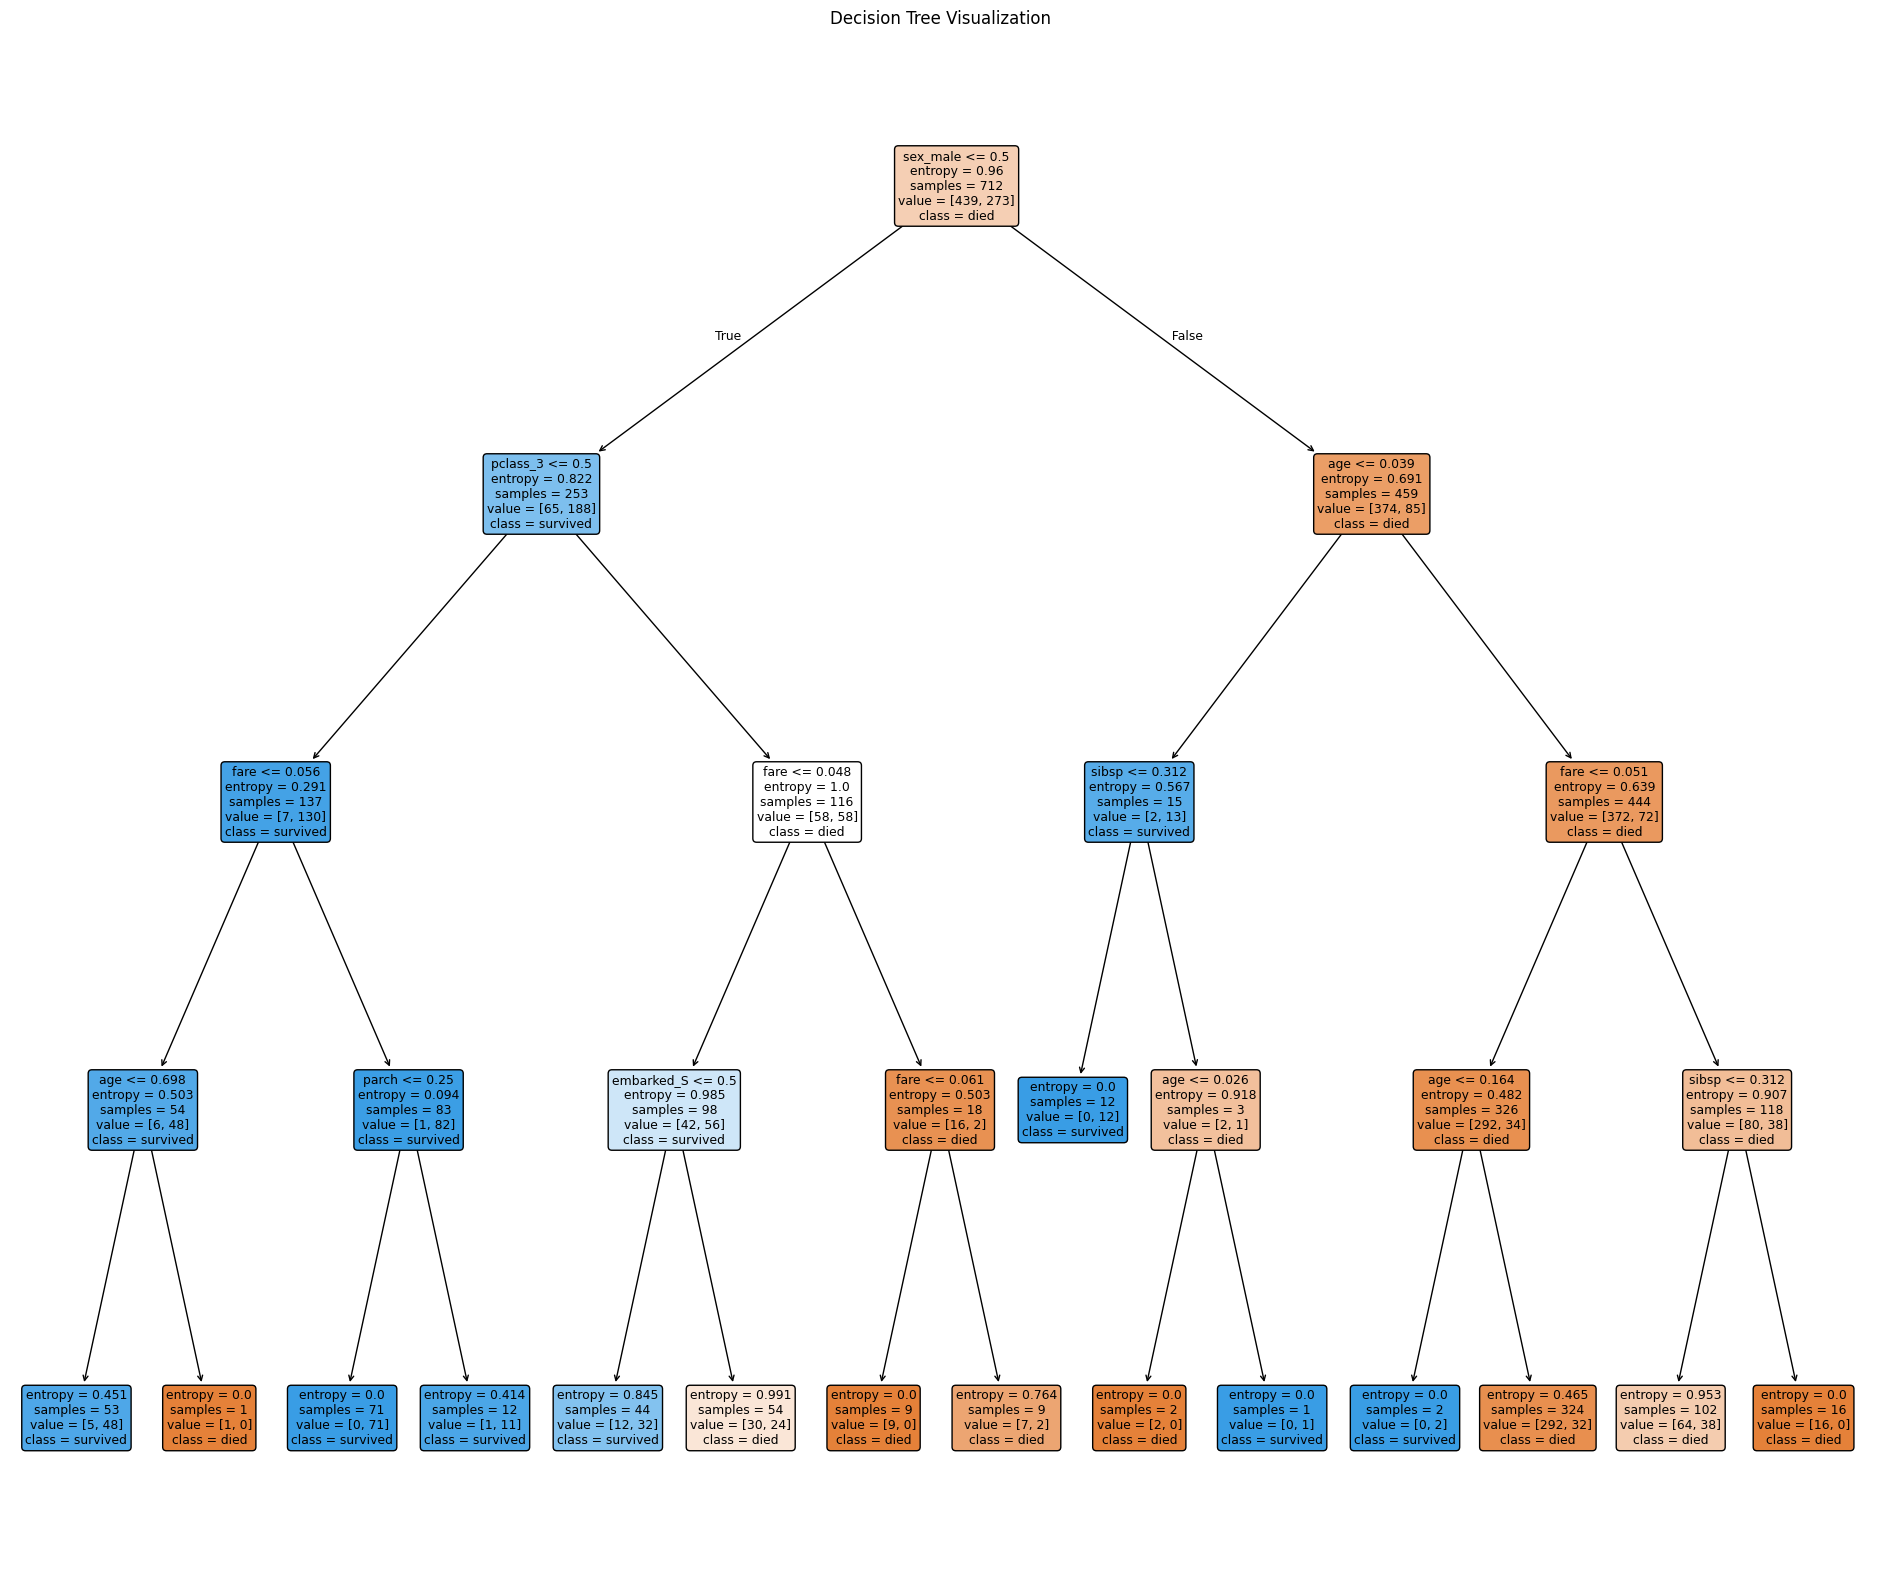

In [341]:
# Decision Tree Visualization
print("Generating decision tree visualization...")
fig, ax = plt.subplots(figsize=(24, 20))
plot_tree(model,
          feature_names=dataset.feature_names,
          class_names=dataset.target_names,
          filled=True,
          rounded=True,
          ax=ax)
plt.title("Decision Tree Visualization")
plt.show()
plt.close(fig)  # Close figure to free memory

<h1></h1>

## <h2><b>4. Evaluación Métricas</b></h2>

In [342]:
# Use probabilities for proper ROC curve
y_pred_proba = model.predict_proba(X_test)[:, 1]

metrics = {
    "Accuracy": accuracy_score(y_test, y_pred),
    "Recall (Sensitivity)": recall_score(y_test, y_pred),
    "Precision": precision_score(y_test, y_pred),
    "Specificity": recall_score(y_test, y_pred, pos_label=0),
    "F1 Score": f1_score(y_test, y_pred),
    "AUC": roc_auc_score(y_test, y_pred_proba),  # Use probabilities for AUC
    "R2":r2_score(y_test, y_pred)
}

print("Model Metrics:")
for name, value in metrics.items():
    print(f"{name}: {value:.4f}")

Model Metrics:
Accuracy: 0.7989
Recall (Sensitivity): 0.5797
Precision: 0.8511
Specificity: 0.9364
F1 Score: 0.6897
AUC: 0.8496
R2: 0.1510


##<h2><b>5. Gráfica de Importancia de Atributos</b></h2>

###<h2><b>5.1. Importancia de atributos</b></h2>

In [343]:
# Feature Importance
print("Calculating feature importances...")
importances = model.feature_importances_
feature_importances = pd.DataFrame({
    'Variable': dataset.feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print("\nTop 15 Important Features:")
print(feature_importances.head(10))

Calculating feature importances...

Top 15 Important Features:
     Variable  Importance
6    sex_male    0.512206
5    pclass_3    0.168353
0         age    0.121232
3        fare    0.119911
1       sibsp    0.050248
8  embarked_S    0.018864
2       parch    0.009186
4    pclass_2    0.000000
7  embarked_Q    0.000000


### <h2><b>5.2. Gráfico de Importancia de Atributos</b></h2>

Generating feature importance plot...


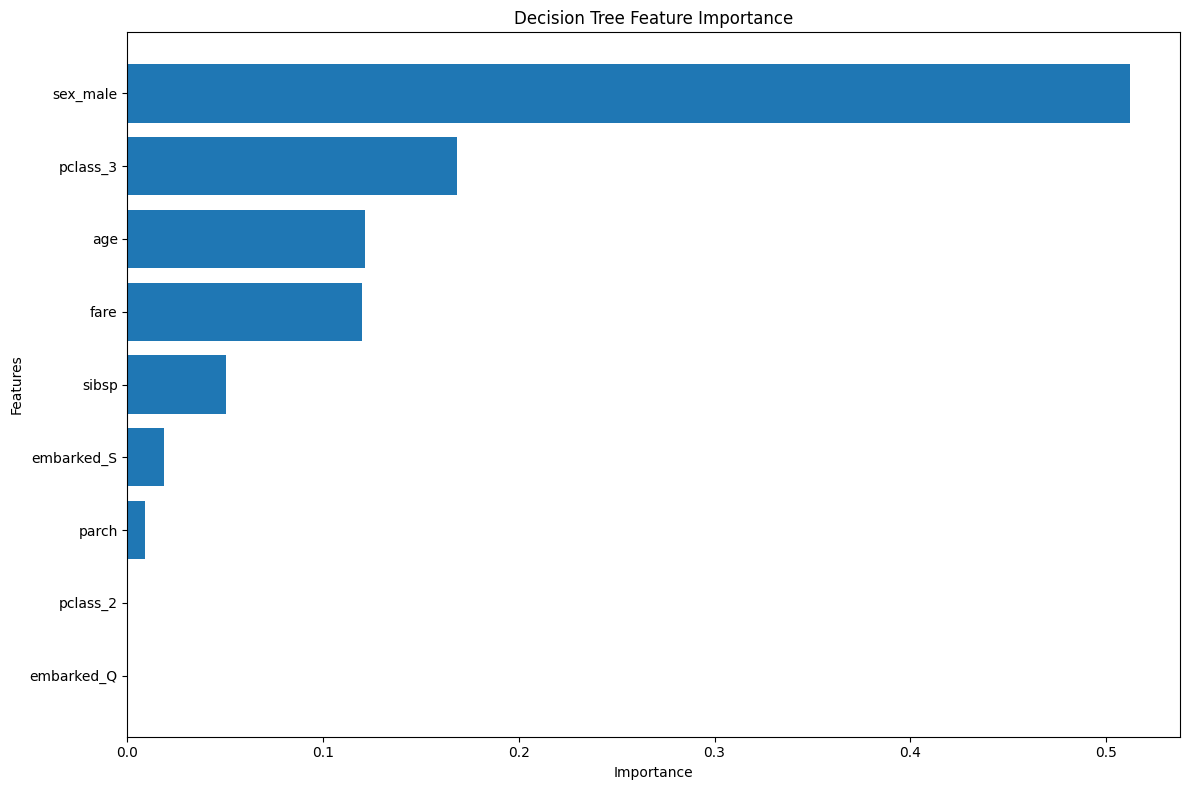

Feature importance plot saved as 'dt_feature_importance.png'


In [344]:
# Feature Importance Visualization
print("Generating feature importance plot...")
plt.figure(figsize=(12, 8))
plt.barh(feature_importances['Variable'][:10],  # Show top 15 features
         feature_importances['Importance'][:10])
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Decision Tree Feature Importance')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()
print("Feature importance plot saved as 'dt_feature_importance.png'")
plt.close()

## <h2><b>6. Guardado del modelo entrenado</b></h2>

### <h2><b>6.1. Guardando el Modelo de Arbol de descisiones</b></h2>

In [345]:
# Save and load model for Titanic Dataset
print("Saving model to 'decision_tree_model_titanic.pkl' for Titanic Dataset")
joblib.dump(model, 'decision_tree_model_titanic.pkl')

Saving model to 'decision_tree_model_titanic.pkl' for Titanic Dataset


['decision_tree_model_titanic.pkl']

### <h2><b>6.2. Validación del Modelo</b></h2>

In [346]:
# Validate loaded model for Titanic Dataset
print("Loading model from 'decision_tree_model_titanic.pkl'")
loaded_model = joblib.load('decision_tree_model_titanic.pkl')

y_pred_loaded = loaded_model.predict(X_test)
acc_loaded = accuracy_score(y_test, y_pred_loaded)
print(f"Loaded model accuracy: {acc_loaded:.4f} (original: {metrics['Accuracy']:.4f})")

Loading model from 'decision_tree_model_titanic.pkl'
Loaded model accuracy: 0.7989 (original: 0.7989)
